## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              84.95
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   3.69e-105
Time:                        15:57:55   Log-Likelihood:                         -313.02
No. Observations:                 404   AIC:                                      652.0
Df Residuals:                     391   BIC:                                      704.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

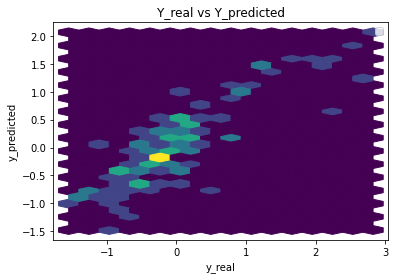

Performance Metrics
Mean Squared Error: 0.21459059841034014
Mean Absolute Error: 0.3440062889158584
Manhattan distance: 35.08864146941757
Euclidean distance: 4.678487045814565


Stats Model MAE 0.3440062889158584


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548


0:	learn: 1.0034431	total: 64.4ms	remaining: 1m 4s
1:	learn: 0.9810312	total: 70.3ms	remaining: 35.1s
2:	learn: 0.9569666	total: 75.8ms	remaining: 25.2s
3:	learn: 0.9396421	total: 78.6ms	remaining: 19.6s
4:	learn: 0.9220226	total: 80.6ms	remaining: 16s
5:	learn: 0.9034976	total: 82.2ms	remaining: 13.6s
6:	learn: 0.8859312	total: 83.7ms	remaining: 11.9s
7:	learn: 0.8675110	total: 85.3ms	remaining: 10.6s
8:	learn: 0.8506963	total: 87.1ms	remaining: 9.59s
9:	learn: 0.8341679	total: 88.9ms	remaining: 8.8s
10:	learn: 0.8174539	total: 90.4ms	remaining: 8.13s
11:	learn: 0.8015969	total: 91.9ms	remaining: 7.56s
12:	learn: 0.7847100	total: 93.4ms	remaining: 7.09s
13:	learn: 0.7693583	total: 95.1ms	remaining: 6.7s
14:	learn: 0.7552632	total: 96.6ms	remaining: 6.34s
15:	learn: 0.7399736	total: 98ms	remaining: 6.03s
16:	learn: 0.7281471	total: 99.5ms	remaining: 5.75s
17:	learn: 0.7156869	total: 101ms	remaining: 5.51s
18:	learn: 0.7026587	total: 103ms	remaining: 5.3s
19:	learn: 0.6886327	total: 104

28:	learn: 0.5952235	total: 120ms	remaining: 4s
29:	learn: 0.5853617	total: 121ms	remaining: 3.92s
30:	learn: 0.5745687	total: 123ms	remaining: 3.86s
31:	learn: 0.5667718	total: 125ms	remaining: 3.78s
32:	learn: 0.5596357	total: 127ms	remaining: 3.71s
33:	learn: 0.5518931	total: 128ms	remaining: 3.64s
34:	learn: 0.5446344	total: 130ms	remaining: 3.59s
35:	learn: 0.5371559	total: 132ms	remaining: 3.53s
36:	learn: 0.5307681	total: 133ms	remaining: 3.47s
37:	learn: 0.5239478	total: 135ms	remaining: 3.41s
38:	learn: 0.5164696	total: 136ms	remaining: 3.36s
39:	learn: 0.5091762	total: 138ms	remaining: 3.31s
40:	learn: 0.5038678	total: 139ms	remaining: 3.26s
41:	learn: 0.4963592	total: 141ms	remaining: 3.21s
42:	learn: 0.4918791	total: 143ms	remaining: 3.17s
43:	learn: 0.4853634	total: 144ms	remaining: 3.13s
44:	learn: 0.4789905	total: 146ms	remaining: 3.1s
45:	learn: 0.4721323	total: 147ms	remaining: 3.06s
46:	learn: 0.4669638	total: 149ms	remaining: 3.02s
47:	learn: 0.4606035	total: 151ms	r

68:	learn: 0.3741799	total: 183ms	remaining: 2.47s
69:	learn: 0.3717687	total: 185ms	remaining: 2.46s
70:	learn: 0.3680611	total: 186ms	remaining: 2.44s
71:	learn: 0.3653663	total: 188ms	remaining: 2.42s
72:	learn: 0.3630941	total: 189ms	remaining: 2.4s
73:	learn: 0.3598328	total: 192ms	remaining: 2.41s
74:	learn: 0.3577572	total: 197ms	remaining: 2.43s
75:	learn: 0.3550451	total: 199ms	remaining: 2.42s
76:	learn: 0.3521065	total: 200ms	remaining: 2.4s
77:	learn: 0.3494586	total: 202ms	remaining: 2.38s
78:	learn: 0.3459898	total: 204ms	remaining: 2.38s
79:	learn: 0.3435531	total: 206ms	remaining: 2.36s
80:	learn: 0.3408537	total: 207ms	remaining: 2.35s
81:	learn: 0.3382851	total: 209ms	remaining: 2.33s
82:	learn: 0.3361098	total: 211ms	remaining: 2.33s
83:	learn: 0.3339425	total: 213ms	remaining: 2.32s
84:	learn: 0.3320858	total: 214ms	remaining: 2.31s
85:	learn: 0.3300479	total: 216ms	remaining: 2.29s
86:	learn: 0.3283897	total: 218ms	remaining: 2.29s
87:	learn: 0.3260807	total: 219ms

104:	learn: 0.2970634	total: 249ms	remaining: 2.12s
105:	learn: 0.2957467	total: 251ms	remaining: 2.11s
106:	learn: 0.2942174	total: 252ms	remaining: 2.1s
107:	learn: 0.2929798	total: 253ms	remaining: 2.09s
108:	learn: 0.2914057	total: 256ms	remaining: 2.09s
109:	learn: 0.2899298	total: 257ms	remaining: 2.08s
110:	learn: 0.2883252	total: 258ms	remaining: 2.07s
111:	learn: 0.2870272	total: 260ms	remaining: 2.06s
112:	learn: 0.2854245	total: 262ms	remaining: 2.06s
113:	learn: 0.2841175	total: 264ms	remaining: 2.05s
114:	learn: 0.2830259	total: 265ms	remaining: 2.04s
115:	learn: 0.2816460	total: 266ms	remaining: 2.03s
116:	learn: 0.2803123	total: 268ms	remaining: 2.02s
117:	learn: 0.2792783	total: 269ms	remaining: 2.01s
118:	learn: 0.2781182	total: 271ms	remaining: 2s
119:	learn: 0.2773978	total: 272ms	remaining: 2s
120:	learn: 0.2759565	total: 274ms	remaining: 1.99s
121:	learn: 0.2748179	total: 275ms	remaining: 1.98s
122:	learn: 0.2732147	total: 276ms	remaining: 1.97s
123:	learn: 0.27158

134:	learn: 0.2597766	total: 302ms	remaining: 1.93s
135:	learn: 0.2586152	total: 306ms	remaining: 1.94s
136:	learn: 0.2578709	total: 308ms	remaining: 1.94s
137:	learn: 0.2566476	total: 309ms	remaining: 1.93s
138:	learn: 0.2552921	total: 311ms	remaining: 1.92s
139:	learn: 0.2546732	total: 313ms	remaining: 1.92s
140:	learn: 0.2540117	total: 316ms	remaining: 1.93s
141:	learn: 0.2529396	total: 319ms	remaining: 1.92s
142:	learn: 0.2524142	total: 323ms	remaining: 1.93s
143:	learn: 0.2511592	total: 326ms	remaining: 1.94s
144:	learn: 0.2505610	total: 333ms	remaining: 1.96s
145:	learn: 0.2496434	total: 338ms	remaining: 1.98s
146:	learn: 0.2489163	total: 340ms	remaining: 1.98s
147:	learn: 0.2483957	total: 345ms	remaining: 1.99s
148:	learn: 0.2475523	total: 348ms	remaining: 1.98s
149:	learn: 0.2466734	total: 353ms	remaining: 2s
150:	learn: 0.2460994	total: 355ms	remaining: 2s
151:	learn: 0.2455274	total: 359ms	remaining: 2s
152:	learn: 0.2447897	total: 362ms	remaining: 2s
153:	learn: 0.2440445	to

154:	learn: 0.2433448	total: 366ms	remaining: 2s
155:	learn: 0.2426405	total: 371ms	remaining: 2s
156:	learn: 0.2417084	total: 373ms	remaining: 2s
157:	learn: 0.2409524	total: 379ms	remaining: 2.02s
158:	learn: 0.2403713	total: 380ms	remaining: 2.01s
159:	learn: 0.2399692	total: 382ms	remaining: 2s
160:	learn: 0.2389180	total: 384ms	remaining: 2s
161:	learn: 0.2382509	total: 386ms	remaining: 2s
162:	learn: 0.2377469	total: 387ms	remaining: 1.99s
163:	learn: 0.2369137	total: 389ms	remaining: 1.98s
164:	learn: 0.2356999	total: 392ms	remaining: 1.99s
165:	learn: 0.2350951	total: 394ms	remaining: 1.98s
166:	learn: 0.2343019	total: 396ms	remaining: 1.97s
167:	learn: 0.2337283	total: 399ms	remaining: 1.97s
168:	learn: 0.2330221	total: 400ms	remaining: 1.97s
169:	learn: 0.2321652	total: 401ms	remaining: 1.96s
170:	learn: 0.2315847	total: 403ms	remaining: 1.95s
171:	learn: 0.2309127	total: 406ms	remaining: 1.96s
172:	learn: 0.2300773	total: 408ms	remaining: 1.95s
173:	learn: 0.2294384	total: 4

182:	learn: 0.2235477	total: 428ms	remaining: 1.91s
183:	learn: 0.2228862	total: 430ms	remaining: 1.91s
184:	learn: 0.2223139	total: 432ms	remaining: 1.9s
185:	learn: 0.2217348	total: 435ms	remaining: 1.91s
186:	learn: 0.2208622	total: 438ms	remaining: 1.91s
187:	learn: 0.2203963	total: 440ms	remaining: 1.9s
188:	learn: 0.2199046	total: 441ms	remaining: 1.89s
189:	learn: 0.2191915	total: 443ms	remaining: 1.89s
190:	learn: 0.2182585	total: 445ms	remaining: 1.88s
191:	learn: 0.2177886	total: 448ms	remaining: 1.88s
192:	learn: 0.2171986	total: 450ms	remaining: 1.88s
193:	learn: 0.2168588	total: 451ms	remaining: 1.87s
194:	learn: 0.2163411	total: 453ms	remaining: 1.87s
195:	learn: 0.2158123	total: 454ms	remaining: 1.86s
196:	learn: 0.2150573	total: 456ms	remaining: 1.86s
197:	learn: 0.2145741	total: 459ms	remaining: 1.86s
198:	learn: 0.2138405	total: 461ms	remaining: 1.85s
199:	learn: 0.2133189	total: 462ms	remaining: 1.85s
200:	learn: 0.2127069	total: 464ms	remaining: 1.84s
201:	learn: 0.

208:	learn: 0.2080650	total: 476ms	remaining: 1.8s
209:	learn: 0.2073357	total: 478ms	remaining: 1.8s
210:	learn: 0.2068705	total: 480ms	remaining: 1.79s
211:	learn: 0.2062741	total: 481ms	remaining: 1.79s
212:	learn: 0.2060496	total: 483ms	remaining: 1.78s
213:	learn: 0.2052477	total: 485ms	remaining: 1.78s
214:	learn: 0.2046055	total: 486ms	remaining: 1.77s
215:	learn: 0.2041386	total: 488ms	remaining: 1.77s
216:	learn: 0.2033934	total: 489ms	remaining: 1.76s
217:	learn: 0.2028215	total: 491ms	remaining: 1.76s
218:	learn: 0.2022247	total: 492ms	remaining: 1.75s
219:	learn: 0.2017084	total: 494ms	remaining: 1.75s
220:	learn: 0.2010826	total: 495ms	remaining: 1.75s
221:	learn: 0.2007897	total: 497ms	remaining: 1.74s
222:	learn: 0.2002467	total: 498ms	remaining: 1.74s
223:	learn: 0.1996806	total: 500ms	remaining: 1.73s
224:	learn: 0.1991959	total: 502ms	remaining: 1.73s
225:	learn: 0.1988348	total: 504ms	remaining: 1.73s
226:	learn: 0.1982574	total: 506ms	remaining: 1.72s
227:	learn: 0.

238:	learn: 0.1928364	total: 536ms	remaining: 1.71s
239:	learn: 0.1921605	total: 538ms	remaining: 1.7s
240:	learn: 0.1918679	total: 540ms	remaining: 1.7s
241:	learn: 0.1916584	total: 543ms	remaining: 1.7s
242:	learn: 0.1912713	total: 545ms	remaining: 1.7s
243:	learn: 0.1907748	total: 547ms	remaining: 1.69s
244:	learn: 0.1905362	total: 548ms	remaining: 1.69s
245:	learn: 0.1899723	total: 550ms	remaining: 1.69s
246:	learn: 0.1895692	total: 552ms	remaining: 1.68s
247:	learn: 0.1891417	total: 554ms	remaining: 1.68s
248:	learn: 0.1886743	total: 555ms	remaining: 1.67s
249:	learn: 0.1881226	total: 557ms	remaining: 1.67s
250:	learn: 0.1878935	total: 558ms	remaining: 1.67s
251:	learn: 0.1874488	total: 560ms	remaining: 1.66s
252:	learn: 0.1872113	total: 562ms	remaining: 1.66s
253:	learn: 0.1866901	total: 564ms	remaining: 1.66s
254:	learn: 0.1864686	total: 566ms	remaining: 1.65s
255:	learn: 0.1859117	total: 567ms	remaining: 1.65s
256:	learn: 0.1856703	total: 569ms	remaining: 1.64s
257:	learn: 0.18

261:	learn: 0.1835817	total: 584ms	remaining: 1.64s
262:	learn: 0.1831283	total: 587ms	remaining: 1.64s
263:	learn: 0.1828189	total: 592ms	remaining: 1.65s
264:	learn: 0.1821781	total: 595ms	remaining: 1.65s
265:	learn: 0.1816377	total: 596ms	remaining: 1.64s
266:	learn: 0.1811902	total: 597ms	remaining: 1.64s
267:	learn: 0.1808032	total: 599ms	remaining: 1.64s
268:	learn: 0.1805574	total: 602ms	remaining: 1.63s
269:	learn: 0.1799165	total: 604ms	remaining: 1.63s
270:	learn: 0.1794140	total: 607ms	remaining: 1.63s
271:	learn: 0.1790193	total: 611ms	remaining: 1.64s


272:	learn: 0.1787259	total: 619ms	remaining: 1.65s
273:	learn: 0.1780679	total: 622ms	remaining: 1.65s


274:	learn: 0.1774426	total: 630ms	remaining: 1.66s
275:	learn: 0.1769421	total: 631ms	remaining: 1.66s
276:	learn: 0.1761743	total: 638ms	remaining: 1.67s
277:	learn: 0.1757260	total: 642ms	remaining: 1.67s
278:	learn: 0.1752917	total: 644ms	remaining: 1.66s
279:	learn: 0.1748411	total: 645ms	remaining: 1.66s
280:	learn: 0.1743221	total: 648ms	remaining: 1.66s
281:	learn: 0.1739926	total: 650ms	remaining: 1.65s
282:	learn: 0.1735914	total: 651ms	remaining: 1.65s
283:	learn: 0.1731970	total: 653ms	remaining: 1.65s
284:	learn: 0.1726528	total: 659ms	remaining: 1.65s
285:	learn: 0.1720629	total: 665ms	remaining: 1.66s
286:	learn: 0.1715073	total: 666ms	remaining: 1.66s
287:	learn: 0.1710965	total: 669ms	remaining: 1.65s
288:	learn: 0.1707241	total: 673ms	remaining: 1.66s
289:	learn: 0.1703460	total: 677ms	remaining: 1.66s
290:	learn: 0.1698946	total: 678ms	remaining: 1.65s
291:	learn: 0.1696067	total: 681ms	remaining: 1.65s
292:	learn: 0.1690816	total: 683ms	remaining: 1.65s
293:	learn: 

299:	learn: 0.1661610	total: 694ms	remaining: 1.62s
300:	learn: 0.1656284	total: 698ms	remaining: 1.62s
301:	learn: 0.1654591	total: 700ms	remaining: 1.62s
302:	learn: 0.1651119	total: 701ms	remaining: 1.61s
303:	learn: 0.1646607	total: 703ms	remaining: 1.61s
304:	learn: 0.1645466	total: 704ms	remaining: 1.6s
305:	learn: 0.1640982	total: 706ms	remaining: 1.6s
306:	learn: 0.1636582	total: 707ms	remaining: 1.6s
307:	learn: 0.1633040	total: 709ms	remaining: 1.59s
308:	learn: 0.1628700	total: 710ms	remaining: 1.59s
309:	learn: 0.1623618	total: 712ms	remaining: 1.58s
310:	learn: 0.1621945	total: 714ms	remaining: 1.58s
311:	learn: 0.1617452	total: 715ms	remaining: 1.58s
312:	learn: 0.1613083	total: 717ms	remaining: 1.57s
313:	learn: 0.1609633	total: 718ms	remaining: 1.57s
314:	learn: 0.1605988	total: 720ms	remaining: 1.56s
315:	learn: 0.1600604	total: 721ms	remaining: 1.56s
316:	learn: 0.1595639	total: 723ms	remaining: 1.56s
317:	learn: 0.1592349	total: 724ms	remaining: 1.55s
318:	learn: 0.1

357:	learn: 0.1464431	total: 797ms	remaining: 1.43s
358:	learn: 0.1459740	total: 799ms	remaining: 1.43s
359:	learn: 0.1456194	total: 802ms	remaining: 1.43s
360:	learn: 0.1453095	total: 804ms	remaining: 1.42s
361:	learn: 0.1449278	total: 806ms	remaining: 1.42s


362:	learn: 0.1444610	total: 807ms	remaining: 1.42s
363:	learn: 0.1441652	total: 819ms	remaining: 1.43s
364:	learn: 0.1439175	total: 821ms	remaining: 1.43s
365:	learn: 0.1436074	total: 823ms	remaining: 1.43s
366:	learn: 0.1432568	total: 825ms	remaining: 1.42s
367:	learn: 0.1429627	total: 827ms	remaining: 1.42s
368:	learn: 0.1427666	total: 832ms	remaining: 1.42s
369:	learn: 0.1425499	total: 834ms	remaining: 1.42s
370:	learn: 0.1422693	total: 836ms	remaining: 1.42s
371:	learn: 0.1419812	total: 838ms	remaining: 1.41s
372:	learn: 0.1416885	total: 840ms	remaining: 1.41s
373:	learn: 0.1413873	total: 841ms	remaining: 1.41s
374:	learn: 0.1409559	total: 844ms	remaining: 1.41s
375:	learn: 0.1405940	total: 847ms	remaining: 1.41s
376:	learn: 0.1405043	total: 849ms	remaining: 1.4s
377:	learn: 0.1401566	total: 851ms	remaining: 1.4s
378:	learn: 0.1399067	total: 852ms	remaining: 1.4s
379:	learn: 0.1397705	total: 855ms	remaining: 1.39s
380:	learn: 0.1395942	total: 859ms	remaining: 1.4s


381:	learn: 0.1393627	total: 861ms	remaining: 1.39s
382:	learn: 0.1391861	total: 863ms	remaining: 1.39s
383:	learn: 0.1389599	total: 865ms	remaining: 1.39s
384:	learn: 0.1386949	total: 867ms	remaining: 1.39s
385:	learn: 0.1383096	total: 870ms	remaining: 1.38s
386:	learn: 0.1379742	total: 872ms	remaining: 1.38s
387:	learn: 0.1377736	total: 874ms	remaining: 1.38s
388:	learn: 0.1375253	total: 876ms	remaining: 1.38s
389:	learn: 0.1373722	total: 879ms	remaining: 1.38s
390:	learn: 0.1372626	total: 886ms	remaining: 1.38s
391:	learn: 0.1369756	total: 888ms	remaining: 1.38s
392:	learn: 0.1367743	total: 889ms	remaining: 1.37s
393:	learn: 0.1365429	total: 891ms	remaining: 1.37s
394:	learn: 0.1364453	total: 892ms	remaining: 1.37s
395:	learn: 0.1360842	total: 894ms	remaining: 1.36s
396:	learn: 0.1358949	total: 895ms	remaining: 1.36s
397:	learn: 0.1357099	total: 896ms	remaining: 1.35s
398:	learn: 0.1356147	total: 899ms	remaining: 1.35s
399:	learn: 0.1353100	total: 901ms	remaining: 1.35s
400:	learn: 

432:	learn: 0.1267834	total: 953ms	remaining: 1.25s
433:	learn: 0.1265707	total: 955ms	remaining: 1.24s
434:	learn: 0.1263187	total: 957ms	remaining: 1.24s
435:	learn: 0.1260867	total: 958ms	remaining: 1.24s
436:	learn: 0.1259833	total: 960ms	remaining: 1.24s
437:	learn: 0.1257057	total: 961ms	remaining: 1.23s
438:	learn: 0.1254715	total: 963ms	remaining: 1.23s


439:	learn: 0.1252617	total: 965ms	remaining: 1.23s
440:	learn: 0.1249974	total: 967ms	remaining: 1.23s
441:	learn: 0.1245996	total: 968ms	remaining: 1.22s
442:	learn: 0.1245474	total: 970ms	remaining: 1.22s
443:	learn: 0.1243107	total: 972ms	remaining: 1.22s
444:	learn: 0.1242130	total: 974ms	remaining: 1.21s
445:	learn: 0.1238771	total: 975ms	remaining: 1.21s
446:	learn: 0.1236085	total: 977ms	remaining: 1.21s
447:	learn: 0.1235604	total: 978ms	remaining: 1.21s
448:	learn: 0.1233769	total: 980ms	remaining: 1.2s
449:	learn: 0.1231277	total: 981ms	remaining: 1.2s
450:	learn: 0.1229038	total: 983ms	remaining: 1.2s
451:	learn: 0.1226018	total: 984ms	remaining: 1.19s
452:	learn: 0.1223486	total: 991ms	remaining: 1.2s
453:	learn: 0.1220995	total: 992ms	remaining: 1.19s
454:	learn: 0.1218308	total: 994ms	remaining: 1.19s
455:	learn: 0.1216824	total: 995ms	remaining: 1.19s
456:	learn: 0.1213735	total: 996ms	remaining: 1.18s
457:	learn: 0.1212554	total: 998ms	remaining: 1.18s
458:	learn: 0.12

482:	learn: 0.1166702	total: 1.04s	remaining: 1.11s
483:	learn: 0.1163030	total: 1.04s	remaining: 1.11s
484:	learn: 0.1160748	total: 1.04s	remaining: 1.11s
485:	learn: 0.1158735	total: 1.04s	remaining: 1.1s
486:	learn: 0.1157596	total: 1.05s	remaining: 1.1s
487:	learn: 0.1155722	total: 1.05s	remaining: 1.1s
488:	learn: 0.1152800	total: 1.05s	remaining: 1.1s
489:	learn: 0.1150285	total: 1.05s	remaining: 1.09s
490:	learn: 0.1148418	total: 1.05s	remaining: 1.09s
491:	learn: 0.1145364	total: 1.05s	remaining: 1.09s
492:	learn: 0.1142981	total: 1.05s	remaining: 1.08s
493:	learn: 0.1140823	total: 1.06s	remaining: 1.08s
494:	learn: 0.1139474	total: 1.06s	remaining: 1.08s
495:	learn: 0.1136139	total: 1.06s	remaining: 1.08s
496:	learn: 0.1133303	total: 1.06s	remaining: 1.07s
497:	learn: 0.1132982	total: 1.06s	remaining: 1.07s
498:	learn: 0.1130684	total: 1.06s	remaining: 1.07s
499:	learn: 0.1129572	total: 1.07s	remaining: 1.07s
500:	learn: 0.1126957	total: 1.07s	remaining: 1.06s
501:	learn: 0.11

534:	learn: 0.1057679	total: 1.13s	remaining: 980ms
535:	learn: 0.1056145	total: 1.13s	remaining: 978ms
536:	learn: 0.1053225	total: 1.13s	remaining: 975ms
537:	learn: 0.1051730	total: 1.13s	remaining: 973ms
538:	learn: 0.1049325	total: 1.13s	remaining: 970ms
539:	learn: 0.1048117	total: 1.14s	remaining: 967ms
540:	learn: 0.1045946	total: 1.14s	remaining: 965ms
541:	learn: 0.1044029	total: 1.14s	remaining: 962ms


542:	learn: 0.1042968	total: 1.14s	remaining: 960ms
543:	learn: 0.1041513	total: 1.15s	remaining: 961ms
544:	learn: 0.1040611	total: 1.15s	remaining: 960ms
545:	learn: 0.1039559	total: 1.15s	remaining: 957ms
546:	learn: 0.1038281	total: 1.15s	remaining: 955ms
547:	learn: 0.1036848	total: 1.15s	remaining: 952ms
548:	learn: 0.1034619	total: 1.16s	remaining: 951ms
549:	learn: 0.1033422	total: 1.16s	remaining: 950ms
550:	learn: 0.1030901	total: 1.16s	remaining: 948ms
551:	learn: 0.1028834	total: 1.16s	remaining: 945ms
552:	learn: 0.1027044	total: 1.17s	remaining: 942ms
553:	learn: 0.1024806	total: 1.17s	remaining: 941ms
554:	learn: 0.1023640	total: 1.17s	remaining: 939ms
555:	learn: 0.1022954	total: 1.17s	remaining: 937ms
556:	learn: 0.1020963	total: 1.18s	remaining: 936ms
557:	learn: 0.1020677	total: 1.18s	remaining: 934ms
558:	learn: 0.1019033	total: 1.18s	remaining: 931ms
559:	learn: 0.1018491	total: 1.18s	remaining: 930ms
560:	learn: 0.1016402	total: 1.19s	remaining: 928ms
561:	learn: 

572:	learn: 0.0996590	total: 1.21s	remaining: 905ms
573:	learn: 0.0995407	total: 1.22s	remaining: 905ms
574:	learn: 0.0993753	total: 1.22s	remaining: 902ms
575:	learn: 0.0992554	total: 1.22s	remaining: 900ms
576:	learn: 0.0990003	total: 1.23s	remaining: 898ms
577:	learn: 0.0988336	total: 1.23s	remaining: 896ms
578:	learn: 0.0986042	total: 1.23s	remaining: 897ms
579:	learn: 0.0985795	total: 1.24s	remaining: 895ms
580:	learn: 0.0983511	total: 1.24s	remaining: 893ms
581:	learn: 0.0980960	total: 1.24s	remaining: 891ms
582:	learn: 0.0979018	total: 1.24s	remaining: 889ms
583:	learn: 0.0976255	total: 1.24s	remaining: 886ms
584:	learn: 0.0974530	total: 1.25s	remaining: 885ms
585:	learn: 0.0972363	total: 1.25s	remaining: 883ms
586:	learn: 0.0970187	total: 1.25s	remaining: 881ms
587:	learn: 0.0969612	total: 1.25s	remaining: 879ms
588:	learn: 0.0968941	total: 1.25s	remaining: 876ms
589:	learn: 0.0966383	total: 1.26s	remaining: 874ms
590:	learn: 0.0965097	total: 1.26s	remaining: 872ms
591:	learn: 

607:	learn: 0.0940622	total: 1.29s	remaining: 835ms
608:	learn: 0.0937903	total: 1.3s	remaining: 834ms
609:	learn: 0.0935108	total: 1.3s	remaining: 833ms
610:	learn: 0.0933011	total: 1.3s	remaining: 831ms
611:	learn: 0.0931827	total: 1.31s	remaining: 828ms


612:	learn: 0.0931600	total: 1.31s	remaining: 830ms
613:	learn: 0.0931292	total: 1.32s	remaining: 830ms
614:	learn: 0.0930319	total: 1.33s	remaining: 830ms
615:	learn: 0.0928711	total: 1.33s	remaining: 830ms
616:	learn: 0.0927627	total: 1.33s	remaining: 828ms
617:	learn: 0.0926222	total: 1.34s	remaining: 827ms
618:	learn: 0.0924452	total: 1.34s	remaining: 826ms
619:	learn: 0.0922999	total: 1.35s	remaining: 825ms
620:	learn: 0.0922533	total: 1.35s	remaining: 823ms
621:	learn: 0.0921247	total: 1.35s	remaining: 823ms
622:	learn: 0.0918961	total: 1.36s	remaining: 822ms
623:	learn: 0.0917030	total: 1.36s	remaining: 821ms
624:	learn: 0.0916117	total: 1.36s	remaining: 819ms
625:	learn: 0.0914778	total: 1.36s	remaining: 816ms
626:	learn: 0.0913479	total: 1.37s	remaining: 814ms
627:	learn: 0.0911944	total: 1.37s	remaining: 812ms
628:	learn: 0.0910426	total: 1.37s	remaining: 809ms
629:	learn: 0.0908802	total: 1.38s	remaining: 808ms
630:	learn: 0.0907771	total: 1.38s	remaining: 805ms
631:	learn: 

633:	learn: 0.0906519	total: 1.39s	remaining: 801ms
634:	learn: 0.0904021	total: 1.39s	remaining: 802ms
635:	learn: 0.0902620	total: 1.4s	remaining: 802ms
636:	learn: 0.0901039	total: 1.4s	remaining: 800ms
637:	learn: 0.0899877	total: 1.41s	remaining: 798ms
638:	learn: 0.0897351	total: 1.41s	remaining: 796ms
639:	learn: 0.0895394	total: 1.41s	remaining: 793ms
640:	learn: 0.0895183	total: 1.41s	remaining: 791ms
641:	learn: 0.0894126	total: 1.41s	remaining: 788ms
642:	learn: 0.0892216	total: 1.42s	remaining: 787ms
643:	learn: 0.0889992	total: 1.42s	remaining: 784ms
644:	learn: 0.0888300	total: 1.42s	remaining: 782ms
645:	learn: 0.0886657	total: 1.42s	remaining: 779ms
646:	learn: 0.0885592	total: 1.42s	remaining: 777ms
647:	learn: 0.0884871	total: 1.43s	remaining: 775ms
648:	learn: 0.0882921	total: 1.43s	remaining: 772ms
649:	learn: 0.0881574	total: 1.43s	remaining: 771ms
650:	learn: 0.0879833	total: 1.43s	remaining: 769ms
651:	learn: 0.0878990	total: 1.44s	remaining: 768ms
652:	learn: 0.

669:	learn: 0.0853349	total: 1.48s	remaining: 727ms
670:	learn: 0.0852245	total: 1.48s	remaining: 725ms
671:	learn: 0.0850051	total: 1.48s	remaining: 722ms
672:	learn: 0.0849366	total: 1.49s	remaining: 722ms
673:	learn: 0.0848230	total: 1.49s	remaining: 720ms
674:	learn: 0.0847156	total: 1.49s	remaining: 719ms
675:	learn: 0.0845525	total: 1.49s	remaining: 716ms


676:	learn: 0.0843684	total: 1.5s	remaining: 715ms
677:	learn: 0.0842771	total: 1.5s	remaining: 712ms
678:	learn: 0.0842106	total: 1.5s	remaining: 710ms
679:	learn: 0.0841127	total: 1.51s	remaining: 709ms
680:	learn: 0.0840897	total: 1.51s	remaining: 706ms
681:	learn: 0.0840232	total: 1.51s	remaining: 704ms
682:	learn: 0.0839160	total: 1.51s	remaining: 702ms
683:	learn: 0.0837905	total: 1.51s	remaining: 699ms
684:	learn: 0.0837188	total: 1.51s	remaining: 697ms
685:	learn: 0.0836008	total: 1.52s	remaining: 694ms
686:	learn: 0.0834643	total: 1.52s	remaining: 693ms
687:	learn: 0.0832861	total: 1.52s	remaining: 690ms
688:	learn: 0.0832117	total: 1.52s	remaining: 688ms
689:	learn: 0.0831030	total: 1.53s	remaining: 686ms
690:	learn: 0.0829823	total: 1.53s	remaining: 683ms
691:	learn: 0.0828573	total: 1.53s	remaining: 681ms
692:	learn: 0.0827990	total: 1.53s	remaining: 678ms
693:	learn: 0.0826571	total: 1.53s	remaining: 676ms
694:	learn: 0.0825001	total: 1.53s	remaining: 674ms
695:	learn: 0.0

712:	learn: 0.0801855	total: 1.57s	remaining: 632ms
713:	learn: 0.0800589	total: 1.57s	remaining: 629ms
714:	learn: 0.0799213	total: 1.57s	remaining: 627ms
715:	learn: 0.0798755	total: 1.58s	remaining: 625ms
716:	learn: 0.0798106	total: 1.58s	remaining: 623ms
717:	learn: 0.0796308	total: 1.58s	remaining: 621ms
718:	learn: 0.0795152	total: 1.58s	remaining: 618ms
719:	learn: 0.0793128	total: 1.58s	remaining: 616ms
720:	learn: 0.0791785	total: 1.58s	remaining: 613ms
721:	learn: 0.0791559	total: 1.59s	remaining: 611ms
722:	learn: 0.0789759	total: 1.59s	remaining: 608ms
723:	learn: 0.0788568	total: 1.59s	remaining: 606ms
724:	learn: 0.0787259	total: 1.59s	remaining: 604ms
725:	learn: 0.0786645	total: 1.59s	remaining: 602ms
726:	learn: 0.0784931	total: 1.6s	remaining: 600ms
727:	learn: 0.0784485	total: 1.6s	remaining: 598ms
728:	learn: 0.0783068	total: 1.6s	remaining: 596ms
729:	learn: 0.0781755	total: 1.6s	remaining: 594ms
730:	learn: 0.0781048	total: 1.61s	remaining: 591ms
731:	learn: 0.07

759:	learn: 0.0747799	total: 1.66s	remaining: 523ms
760:	learn: 0.0746488	total: 1.66s	remaining: 521ms
761:	learn: 0.0745742	total: 1.66s	remaining: 519ms
762:	learn: 0.0744262	total: 1.67s	remaining: 517ms
763:	learn: 0.0742143	total: 1.67s	remaining: 516ms
764:	learn: 0.0740484	total: 1.67s	remaining: 513ms
765:	learn: 0.0739987	total: 1.67s	remaining: 511ms
766:	learn: 0.0738563	total: 1.68s	remaining: 509ms
767:	learn: 0.0737505	total: 1.68s	remaining: 507ms


768:	learn: 0.0736397	total: 1.68s	remaining: 505ms
769:	learn: 0.0735950	total: 1.68s	remaining: 503ms
770:	learn: 0.0735074	total: 1.69s	remaining: 500ms
771:	learn: 0.0733429	total: 1.69s	remaining: 498ms
772:	learn: 0.0732988	total: 1.69s	remaining: 496ms
773:	learn: 0.0731350	total: 1.69s	remaining: 494ms
774:	learn: 0.0730448	total: 1.7s	remaining: 492ms
775:	learn: 0.0729942	total: 1.7s	remaining: 491ms
776:	learn: 0.0729148	total: 1.7s	remaining: 489ms
777:	learn: 0.0728345	total: 1.71s	remaining: 487ms
778:	learn: 0.0727095	total: 1.72s	remaining: 487ms
779:	learn: 0.0726464	total: 1.72s	remaining: 485ms
780:	learn: 0.0725341	total: 1.73s	remaining: 485ms
781:	learn: 0.0724989	total: 1.73s	remaining: 483ms
782:	learn: 0.0723269	total: 1.73s	remaining: 480ms
783:	learn: 0.0722365	total: 1.73s	remaining: 478ms
784:	learn: 0.0721598	total: 1.74s	remaining: 476ms
785:	learn: 0.0721208	total: 1.74s	remaining: 474ms
786:	learn: 0.0720512	total: 1.74s	remaining: 471ms


787:	learn: 0.0719768	total: 1.74s	remaining: 469ms
788:	learn: 0.0718742	total: 1.75s	remaining: 468ms
789:	learn: 0.0717805	total: 1.75s	remaining: 465ms
790:	learn: 0.0716550	total: 1.75s	remaining: 463ms
791:	learn: 0.0715879	total: 1.75s	remaining: 461ms
792:	learn: 0.0713973	total: 1.76s	remaining: 459ms
793:	learn: 0.0712784	total: 1.76s	remaining: 456ms
794:	learn: 0.0712132	total: 1.76s	remaining: 454ms
795:	learn: 0.0711133	total: 1.76s	remaining: 452ms
796:	learn: 0.0709630	total: 1.76s	remaining: 449ms
797:	learn: 0.0708564	total: 1.76s	remaining: 447ms
798:	learn: 0.0706782	total: 1.77s	remaining: 444ms
799:	learn: 0.0705803	total: 1.77s	remaining: 442ms
800:	learn: 0.0705327	total: 1.77s	remaining: 440ms
801:	learn: 0.0704469	total: 1.77s	remaining: 437ms
802:	learn: 0.0704133	total: 1.77s	remaining: 435ms
803:	learn: 0.0703428	total: 1.77s	remaining: 433ms
804:	learn: 0.0702460	total: 1.78s	remaining: 430ms
805:	learn: 0.0701320	total: 1.78s	remaining: 428ms
806:	learn: 

835:	learn: 0.0670535	total: 1.83s	remaining: 359ms
836:	learn: 0.0670178	total: 1.83s	remaining: 356ms
837:	learn: 0.0668822	total: 1.83s	remaining: 354ms
838:	learn: 0.0667342	total: 1.83s	remaining: 352ms
839:	learn: 0.0667223	total: 1.84s	remaining: 350ms
840:	learn: 0.0666317	total: 1.84s	remaining: 348ms
841:	learn: 0.0665314	total: 1.84s	remaining: 345ms
842:	learn: 0.0664930	total: 1.84s	remaining: 343ms
843:	learn: 0.0663791	total: 1.84s	remaining: 341ms
844:	learn: 0.0662631	total: 1.84s	remaining: 338ms
845:	learn: 0.0661306	total: 1.85s	remaining: 336ms
846:	learn: 0.0660324	total: 1.85s	remaining: 334ms
847:	learn: 0.0659265	total: 1.85s	remaining: 332ms
848:	learn: 0.0658176	total: 1.85s	remaining: 329ms
849:	learn: 0.0656983	total: 1.85s	remaining: 327ms
850:	learn: 0.0656670	total: 1.85s	remaining: 325ms


851:	learn: 0.0655233	total: 1.86s	remaining: 323ms
852:	learn: 0.0653663	total: 1.86s	remaining: 320ms
853:	learn: 0.0653050	total: 1.86s	remaining: 318ms
854:	learn: 0.0652728	total: 1.86s	remaining: 316ms
855:	learn: 0.0652115	total: 1.87s	remaining: 314ms
856:	learn: 0.0651495	total: 1.87s	remaining: 312ms
857:	learn: 0.0650930	total: 1.87s	remaining: 310ms
858:	learn: 0.0650215	total: 1.87s	remaining: 308ms
859:	learn: 0.0649591	total: 1.88s	remaining: 306ms
860:	learn: 0.0648567	total: 1.88s	remaining: 303ms
861:	learn: 0.0648468	total: 1.88s	remaining: 301ms
862:	learn: 0.0646774	total: 1.88s	remaining: 299ms
863:	learn: 0.0646206	total: 1.88s	remaining: 296ms
864:	learn: 0.0644684	total: 1.89s	remaining: 294ms
865:	learn: 0.0644499	total: 1.89s	remaining: 292ms
866:	learn: 0.0644333	total: 1.89s	remaining: 290ms
867:	learn: 0.0643122	total: 1.89s	remaining: 287ms
868:	learn: 0.0642185	total: 1.89s	remaining: 285ms
869:	learn: 0.0641346	total: 1.89s	remaining: 283ms
870:	learn: 

889:	learn: 0.0622053	total: 1.93s	remaining: 238ms
890:	learn: 0.0620914	total: 1.93s	remaining: 236ms
891:	learn: 0.0620278	total: 1.93s	remaining: 234ms
892:	learn: 0.0619353	total: 1.93s	remaining: 231ms
893:	learn: 0.0618369	total: 1.93s	remaining: 229ms
894:	learn: 0.0617465	total: 1.93s	remaining: 227ms
895:	learn: 0.0616168	total: 1.94s	remaining: 225ms
896:	learn: 0.0615482	total: 1.94s	remaining: 222ms
897:	learn: 0.0614745	total: 1.94s	remaining: 220ms
898:	learn: 0.0614097	total: 1.94s	remaining: 218ms
899:	learn: 0.0612787	total: 1.94s	remaining: 216ms
900:	learn: 0.0611861	total: 1.94s	remaining: 213ms
901:	learn: 0.0611504	total: 1.94s	remaining: 211ms
902:	learn: 0.0610360	total: 1.95s	remaining: 209ms
903:	learn: 0.0609803	total: 1.95s	remaining: 207ms
904:	learn: 0.0609286	total: 1.95s	remaining: 204ms
905:	learn: 0.0608489	total: 1.95s	remaining: 202ms
906:	learn: 0.0607929	total: 1.95s	remaining: 200ms
907:	learn: 0.0607746	total: 1.95s	remaining: 198ms
908:	learn: 

943:	learn: 0.0580526	total: 2.01s	remaining: 119ms
944:	learn: 0.0579839	total: 2.01s	remaining: 117ms
945:	learn: 0.0578648	total: 2.01s	remaining: 115ms
946:	learn: 0.0578177	total: 2.01s	remaining: 113ms
947:	learn: 0.0578089	total: 2.02s	remaining: 111ms
948:	learn: 0.0577368	total: 2.02s	remaining: 108ms
949:	learn: 0.0577286	total: 2.02s	remaining: 106ms
950:	learn: 0.0576641	total: 2.02s	remaining: 104ms
951:	learn: 0.0575357	total: 2.02s	remaining: 102ms
952:	learn: 0.0574963	total: 2.02s	remaining: 99.8ms
953:	learn: 0.0574876	total: 2.03s	remaining: 97.7ms
954:	learn: 0.0573825	total: 2.03s	remaining: 95.5ms
955:	learn: 0.0573139	total: 2.03s	remaining: 93.4ms
956:	learn: 0.0572408	total: 2.03s	remaining: 91.3ms
957:	learn: 0.0571511	total: 2.03s	remaining: 89.2ms


958:	learn: 0.0570421	total: 2.04s	remaining: 87.1ms
959:	learn: 0.0569386	total: 2.04s	remaining: 85ms
960:	learn: 0.0568590	total: 2.04s	remaining: 82.8ms
961:	learn: 0.0568146	total: 2.04s	remaining: 80.7ms
962:	learn: 0.0566955	total: 2.04s	remaining: 78.5ms
963:	learn: 0.0566894	total: 2.05s	remaining: 76.4ms
964:	learn: 0.0565816	total: 2.05s	remaining: 74.3ms
965:	learn: 0.0564695	total: 2.05s	remaining: 72.1ms
966:	learn: 0.0563784	total: 2.05s	remaining: 70ms
967:	learn: 0.0562670	total: 2.05s	remaining: 67.8ms
968:	learn: 0.0561458	total: 2.05s	remaining: 65.7ms
969:	learn: 0.0560293	total: 2.06s	remaining: 63.6ms
970:	learn: 0.0559482	total: 2.06s	remaining: 61.5ms
971:	learn: 0.0558542	total: 2.06s	remaining: 59.3ms
972:	learn: 0.0557553	total: 2.06s	remaining: 57.2ms
973:	learn: 0.0556371	total: 2.06s	remaining: 55.1ms
974:	learn: 0.0555747	total: 2.06s	remaining: 53ms
975:	learn: 0.0554863	total: 2.07s	remaining: 50.9ms
976:	learn: 0.0554794	total: 2.07s	remaining: 48.8ms

984:	learn: 0.0548975	total: 2.09s	remaining: 31.8ms
985:	learn: 0.0548095	total: 2.1s	remaining: 29.8ms
986:	learn: 0.0547572	total: 2.1s	remaining: 27.7ms
987:	learn: 0.0547198	total: 2.11s	remaining: 25.7ms
988:	learn: 0.0546851	total: 2.12s	remaining: 23.5ms
989:	learn: 0.0546072	total: 2.12s	remaining: 21.4ms
990:	learn: 0.0545570	total: 2.12s	remaining: 19.3ms
991:	learn: 0.0545003	total: 2.13s	remaining: 17.2ms
992:	learn: 0.0544481	total: 2.13s	remaining: 15ms
993:	learn: 0.0543694	total: 2.13s	remaining: 12.9ms
994:	learn: 0.0543323	total: 2.13s	remaining: 10.7ms
995:	learn: 0.0543049	total: 2.14s	remaining: 8.59ms
996:	learn: 0.0542484	total: 2.14s	remaining: 6.44ms
997:	learn: 0.0540853	total: 2.14s	remaining: 4.29ms
998:	learn: 0.0540597	total: 2.15s	remaining: 2.15ms
999:	learn: 0.0540520	total: 2.16s	remaining: 0us


Mean Absolute error 0.19839858127363708


Catboost MAE 0.19839858127363708


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.60877 | train_mse: 1.18682 | train_mae: 0.83032 |  0:00:01s


epoch 1  | loss: 0.88606 | train_mse: 1.94281 | train_mae: 0.71757 |  0:00:02s


epoch 2  | loss: 0.72033 | train_mse: 0.58302 | train_mae: 0.56891 |  0:00:02s


epoch 3  | loss: 0.53326 | train_mse: 0.48592 | train_mae: 0.49865 |  0:00:03s


epoch 4  | loss: 0.50949 | train_mse: 0.39856 | train_mae: 0.45779 |  0:00:03s


epoch 5  | loss: 0.43629 | train_mse: 0.39561 | train_mae: 0.44584 |  0:00:03s


epoch 6  | loss: 0.46116 | train_mse: 0.46979 | train_mae: 0.49071 |  0:00:04s


epoch 7  | loss: 0.41014 | train_mse: 0.32339 | train_mae: 0.41896 |  0:00:04s


epoch 8  | loss: 0.37274 | train_mse: 0.2879  | train_mae: 0.39109 |  0:00:05s


epoch 9  | loss: 0.34548 | train_mse: 0.26846 | train_mae: 0.38432 |  0:00:05s


epoch 10 | loss: 0.39122 | train_mse: 0.2404  | train_mae: 0.35117 |  0:00:05s


epoch 11 | loss: 0.3305  | train_mse: 0.23485 | train_mae: 0.34212 |  0:00:06s


epoch 12 | loss: 0.30833 | train_mse: 0.23842 | train_mae: 0.33063 |  0:00:06s


epoch 13 | loss: 0.31091 | train_mse: 0.23321 | train_mae: 0.33203 |  0:00:08s


epoch 14 | loss: 0.28995 | train_mse: 0.22448 | train_mae: 0.32205 |  0:00:09s


epoch 15 | loss: 0.28744 | train_mse: 0.27171 | train_mae: 0.37632 |  0:00:10s


epoch 16 | loss: 0.34772 | train_mse: 0.21402 | train_mae: 0.31778 |  0:00:12s


epoch 17 | loss: 0.25196 | train_mse: 0.26054 | train_mae: 0.34081 |  0:00:13s


epoch 18 | loss: 0.31691 | train_mse: 0.21956 | train_mae: 0.32591 |  0:00:13s


epoch 19 | loss: 0.20341 | train_mse: 0.18949 | train_mae: 0.3075  |  0:00:14s


epoch 20 | loss: 0.26361 | train_mse: 0.16637 | train_mae: 0.29006 |  0:00:14s


epoch 21 | loss: 0.27129 | train_mse: 0.19798 | train_mae: 0.31265 |  0:00:15s


epoch 22 | loss: 0.19754 | train_mse: 0.18223 | train_mae: 0.28557 |  0:00:15s


epoch 23 | loss: 0.20814 | train_mse: 0.17574 | train_mae: 0.28024 |  0:00:16s


epoch 24 | loss: 0.23685 | train_mse: 0.15788 | train_mae: 0.27296 |  0:00:16s


epoch 25 | loss: 0.22039 | train_mse: 0.15276 | train_mae: 0.26927 |  0:00:16s


epoch 26 | loss: 0.18825 | train_mse: 0.16243 | train_mae: 0.27002 |  0:00:17s


epoch 27 | loss: 0.21455 | train_mse: 0.1646  | train_mae: 0.27517 |  0:00:17s


epoch 28 | loss: 0.18775 | train_mse: 0.15706 | train_mae: 0.26723 |  0:00:17s


epoch 29 | loss: 0.231   | train_mse: 0.1473  | train_mae: 0.25503 |  0:00:18s


epoch 30 | loss: 0.22884 | train_mse: 0.1578  | train_mae: 0.26707 |  0:00:18s


epoch 31 | loss: 0.23477 | train_mse: 0.13769 | train_mae: 0.25045 |  0:00:19s


epoch 32 | loss: 0.20828 | train_mse: 0.14241 | train_mae: 0.255   |  0:00:19s


epoch 33 | loss: 0.21344 | train_mse: 0.13852 | train_mae: 0.2485  |  0:00:20s


epoch 34 | loss: 0.20121 | train_mse: 0.14103 | train_mae: 0.25034 |  0:00:20s


epoch 35 | loss: 0.19281 | train_mse: 0.14358 | train_mae: 0.25464 |  0:00:20s


epoch 36 | loss: 0.22697 | train_mse: 0.14497 | train_mae: 0.25005 |  0:00:21s


epoch 37 | loss: 0.19702 | train_mse: 0.14765 | train_mae: 0.24991 |  0:00:21s


epoch 38 | loss: 0.21796 | train_mse: 0.13846 | train_mae: 0.24923 |  0:00:21s


epoch 39 | loss: 0.18852 | train_mse: 0.13593 | train_mae: 0.24377 |  0:00:22s


epoch 40 | loss: 0.17277 | train_mse: 0.13943 | train_mae: 0.24481 |  0:00:22s


epoch 41 | loss: 0.2218  | train_mse: 0.15525 | train_mae: 0.26635 |  0:00:22s


epoch 42 | loss: 0.21911 | train_mse: 0.13792 | train_mae: 0.24524 |  0:00:23s


epoch 43 | loss: 0.20985 | train_mse: 0.13473 | train_mae: 0.24457 |  0:00:23s


epoch 44 | loss: 0.19889 | train_mse: 0.15398 | train_mae: 0.26346 |  0:00:24s


epoch 45 | loss: 0.18875 | train_mse: 0.13323 | train_mae: 0.24838 |  0:00:24s


epoch 46 | loss: 0.21419 | train_mse: 0.14456 | train_mae: 0.25678 |  0:00:24s


epoch 47 | loss: 0.22134 | train_mse: 0.13414 | train_mae: 0.248   |  0:00:25s


epoch 48 | loss: 0.18888 | train_mse: 0.14164 | train_mae: 0.25337 |  0:00:25s


epoch 49 | loss: 0.19537 | train_mse: 0.13357 | train_mae: 0.24592 |  0:00:25s


epoch 50 | loss: 0.19233 | train_mse: 0.14031 | train_mae: 0.2534  |  0:00:26s


epoch 51 | loss: 0.21762 | train_mse: 0.13496 | train_mae: 0.24909 |  0:00:26s


epoch 52 | loss: 0.17942 | train_mse: 0.12766 | train_mae: 0.23825 |  0:00:26s


epoch 53 | loss: 0.22239 | train_mse: 0.13385 | train_mae: 0.24823 |  0:00:27s


epoch 54 | loss: 0.19651 | train_mse: 0.12689 | train_mae: 0.23672 |  0:00:27s


epoch 55 | loss: 0.19158 | train_mse: 0.12636 | train_mae: 0.23837 |  0:00:28s


epoch 56 | loss: 0.17671 | train_mse: 0.12337 | train_mae: 0.23745 |  0:00:28s


epoch 57 | loss: 0.16457 | train_mse: 0.13338 | train_mae: 0.24661 |  0:00:29s


epoch 58 | loss: 0.16303 | train_mse: 0.12988 | train_mae: 0.24388 |  0:00:29s


epoch 59 | loss: 0.22379 | train_mse: 0.12791 | train_mae: 0.24156 |  0:00:30s


epoch 60 | loss: 0.20495 | train_mse: 0.1281  | train_mae: 0.24035 |  0:00:30s


epoch 61 | loss: 0.1606  | train_mse: 0.12926 | train_mae: 0.23625 |  0:00:30s


epoch 62 | loss: 0.16078 | train_mse: 0.15066 | train_mae: 0.24899 |  0:00:31s


epoch 63 | loss: 0.23375 | train_mse: 0.15303 | train_mae: 0.25236 |  0:00:31s


epoch 64 | loss: 0.17351 | train_mse: 0.14027 | train_mae: 0.24664 |  0:00:31s


epoch 65 | loss: 0.19934 | train_mse: 0.14142 | train_mae: 0.24508 |  0:00:32s


epoch 66 | loss: 0.20853 | train_mse: 0.1482  | train_mae: 0.25073 |  0:00:32s


epoch 67 | loss: 0.22461 | train_mse: 0.13812 | train_mae: 0.24954 |  0:00:32s


epoch 68 | loss: 0.17841 | train_mse: 0.13076 | train_mae: 0.2379  |  0:00:33s


epoch 69 | loss: 0.1933  | train_mse: 0.13454 | train_mae: 0.24456 |  0:00:33s


epoch 70 | loss: 0.19219 | train_mse: 0.13116 | train_mae: 0.24669 |  0:00:33s


epoch 71 | loss: 0.18613 | train_mse: 0.13266 | train_mae: 0.24383 |  0:00:34s


epoch 72 | loss: 0.20833 | train_mse: 0.15642 | train_mae: 0.26756 |  0:00:34s


epoch 73 | loss: 0.22181 | train_mse: 0.13008 | train_mae: 0.24156 |  0:00:35s


epoch 74 | loss: 0.19911 | train_mse: 0.12524 | train_mae: 0.23263 |  0:00:35s


epoch 75 | loss: 0.19175 | train_mse: 0.12956 | train_mae: 0.23476 |  0:00:35s


epoch 76 | loss: 0.18129 | train_mse: 0.12562 | train_mae: 0.23377 |  0:00:36s


epoch 77 | loss: 0.1781  | train_mse: 0.13808 | train_mae: 0.25181 |  0:00:36s


epoch 78 | loss: 0.21614 | train_mse: 0.12194 | train_mae: 0.23103 |  0:00:36s


epoch 79 | loss: 0.2108  | train_mse: 0.14432 | train_mae: 0.25818 |  0:00:37s


epoch 80 | loss: 0.19574 | train_mse: 0.1283  | train_mae: 0.24076 |  0:00:37s


epoch 81 | loss: 0.17124 | train_mse: 0.12326 | train_mae: 0.23451 |  0:00:38s


epoch 82 | loss: 0.1943  | train_mse: 0.12326 | train_mae: 0.23953 |  0:00:38s


epoch 83 | loss: 0.18338 | train_mse: 0.11965 | train_mae: 0.23201 |  0:00:38s


epoch 84 | loss: 0.22355 | train_mse: 0.12611 | train_mae: 0.24249 |  0:00:39s


epoch 85 | loss: 0.16736 | train_mse: 0.12414 | train_mae: 0.23402 |  0:00:39s


epoch 86 | loss: 0.17075 | train_mse: 0.12564 | train_mae: 0.23399 |  0:00:39s


epoch 87 | loss: 0.19609 | train_mse: 0.13058 | train_mae: 0.24124 |  0:00:40s


epoch 88 | loss: 0.16596 | train_mse: 0.12302 | train_mae: 0.23551 |  0:00:40s


epoch 89 | loss: 0.21525 | train_mse: 0.11716 | train_mae: 0.22067 |  0:00:41s


epoch 90 | loss: 0.16902 | train_mse: 0.11814 | train_mae: 0.22832 |  0:00:41s


epoch 91 | loss: 0.1636  | train_mse: 0.11335 | train_mae: 0.21593 |  0:00:42s


epoch 92 | loss: 0.18886 | train_mse: 0.11494 | train_mae: 0.22186 |  0:00:42s


epoch 93 | loss: 0.16416 | train_mse: 0.11433 | train_mae: 0.22647 |  0:00:42s


epoch 94 | loss: 0.16864 | train_mse: 0.11495 | train_mae: 0.2193  |  0:00:43s


epoch 95 | loss: 0.20325 | train_mse: 0.12211 | train_mae: 0.23574 |  0:00:43s


epoch 96 | loss: 0.18497 | train_mse: 0.11752 | train_mae: 0.2248  |  0:00:43s


epoch 97 | loss: 0.17055 | train_mse: 0.10988 | train_mae: 0.21344 |  0:00:44s


epoch 98 | loss: 0.2497  | train_mse: 0.13601 | train_mae: 0.24218 |  0:00:44s


epoch 99 | loss: 0.15808 | train_mse: 0.11911 | train_mae: 0.22834 |  0:00:45s


epoch 100| loss: 0.17968 | train_mse: 0.13057 | train_mae: 0.2361  |  0:00:45s


epoch 101| loss: 0.16246 | train_mse: 0.11716 | train_mae: 0.22067 |  0:00:46s


epoch 102| loss: 0.17418 | train_mse: 0.1228  | train_mae: 0.23015 |  0:00:47s


epoch 103| loss: 0.16048 | train_mse: 0.11673 | train_mae: 0.225   |  0:00:47s


epoch 104| loss: 0.16988 | train_mse: 0.1134  | train_mae: 0.21501 |  0:00:47s


epoch 105| loss: 0.22014 | train_mse: 0.12777 | train_mae: 0.23666 |  0:00:48s


epoch 106| loss: 0.17766 | train_mse: 0.12007 | train_mae: 0.22213 |  0:00:48s


epoch 107| loss: 0.15725 | train_mse: 0.11597 | train_mae: 0.21537 |  0:00:48s


epoch 108| loss: 0.18375 | train_mse: 0.10999 | train_mae: 0.21048 |  0:00:48s


epoch 109| loss: 0.16698 | train_mse: 0.12367 | train_mae: 0.22591 |  0:00:49s


epoch 110| loss: 0.14559 | train_mse: 0.11387 | train_mae: 0.21431 |  0:00:49s


epoch 111| loss: 0.2238  | train_mse: 0.1179  | train_mae: 0.22199 |  0:00:49s


epoch 112| loss: 0.17236 | train_mse: 0.11968 | train_mae: 0.22754 |  0:00:50s


epoch 113| loss: 0.15988 | train_mse: 0.12283 | train_mae: 0.23081 |  0:00:50s


epoch 114| loss: 0.19184 | train_mse: 0.12182 | train_mae: 0.22478 |  0:00:50s


epoch 115| loss: 0.16338 | train_mse: 0.12526 | train_mae: 0.23176 |  0:00:51s


epoch 116| loss: 0.18458 | train_mse: 0.11827 | train_mae: 0.22176 |  0:00:51s


epoch 117| loss: 0.15877 | train_mse: 0.11179 | train_mae: 0.21164 |  0:00:51s


epoch 118| loss: 0.17298 | train_mse: 0.11229 | train_mae: 0.21612 |  0:00:51s


epoch 119| loss: 0.18886 | train_mse: 0.12247 | train_mae: 0.22972 |  0:00:52s


epoch 120| loss: 0.18655 | train_mse: 0.13091 | train_mae: 0.24048 |  0:00:52s


epoch 121| loss: 0.21458 | train_mse: 0.11626 | train_mae: 0.22036 |  0:00:52s


epoch 122| loss: 0.17276 | train_mse: 0.1306  | train_mae: 0.23507 |  0:00:53s


epoch 123| loss: 0.17341 | train_mse: 0.12656 | train_mae: 0.23282 |  0:00:53s


epoch 124| loss: 0.1598  | train_mse: 0.11913 | train_mae: 0.22015 |  0:00:53s


epoch 125| loss: 0.1963  | train_mse: 0.11971 | train_mae: 0.22486 |  0:00:54s


epoch 126| loss: 0.17488 | train_mse: 0.11793 | train_mae: 0.22113 |  0:00:54s


epoch 127| loss: 0.17271 | train_mse: 0.12124 | train_mae: 0.23243 |  0:00:54s


epoch 128| loss: 0.14898 | train_mse: 0.12416 | train_mae: 0.22723 |  0:00:55s


epoch 129| loss: 0.19664 | train_mse: 0.13115 | train_mae: 0.23651 |  0:00:55s


epoch 130| loss: 0.17222 | train_mse: 0.11376 | train_mae: 0.2153  |  0:00:55s


epoch 131| loss: 0.18044 | train_mse: 0.11531 | train_mae: 0.21775 |  0:00:56s


epoch 132| loss: 0.17842 | train_mse: 0.11622 | train_mae: 0.2189  |  0:00:56s


epoch 133| loss: 0.16662 | train_mse: 0.12877 | train_mae: 0.23432 |  0:00:56s


epoch 134| loss: 0.19101 | train_mse: 0.11007 | train_mae: 0.21521 |  0:00:57s


epoch 135| loss: 0.15952 | train_mse: 0.11367 | train_mae: 0.21524 |  0:00:57s


epoch 136| loss: 0.18658 | train_mse: 0.13274 | train_mae: 0.23408 |  0:00:57s


epoch 137| loss: 0.13719 | train_mse: 0.12008 | train_mae: 0.22477 |  0:00:58s


epoch 138| loss: 0.17048 | train_mse: 0.11416 | train_mae: 0.21439 |  0:00:58s


epoch 139| loss: 0.15676 | train_mse: 0.11356 | train_mae: 0.22044 |  0:00:58s


epoch 140| loss: 0.16724 | train_mse: 0.11596 | train_mae: 0.22276 |  0:00:59s


epoch 141| loss: 0.17248 | train_mse: 0.11036 | train_mae: 0.21471 |  0:00:59s


epoch 142| loss: 0.15878 | train_mse: 0.11311 | train_mae: 0.21751 |  0:00:59s


epoch 143| loss: 0.18342 | train_mse: 0.11548 | train_mae: 0.21875 |  0:01:00s


epoch 144| loss: 0.15628 | train_mse: 0.12555 | train_mae: 0.23294 |  0:01:00s


epoch 145| loss: 0.16241 | train_mse: 0.10838 | train_mae: 0.20987 |  0:01:00s


epoch 146| loss: 0.20796 | train_mse: 0.11433 | train_mae: 0.21793 |  0:01:01s


epoch 147| loss: 0.18618 | train_mse: 0.11557 | train_mae: 0.22192 |  0:01:01s


epoch 148| loss: 0.16706 | train_mse: 0.11233 | train_mae: 0.21715 |  0:01:01s


epoch 149| loss: 0.14771 | train_mse: 0.11178 | train_mae: 0.21591 |  0:01:02s


epoch 150| loss: 0.13393 | train_mse: 0.12159 | train_mae: 0.22529 |  0:01:02s


epoch 151| loss: 0.17157 | train_mse: 0.11332 | train_mae: 0.21037 |  0:01:03s


epoch 152| loss: 0.14722 | train_mse: 0.12091 | train_mae: 0.22396 |  0:01:04s


epoch 153| loss: 0.1397  | train_mse: 0.11292 | train_mae: 0.21543 |  0:01:04s


epoch 154| loss: 0.17822 | train_mse: 0.10949 | train_mae: 0.21259 |  0:01:06s


epoch 155| loss: 0.1928  | train_mse: 0.11388 | train_mae: 0.21543 |  0:01:06s


epoch 156| loss: 0.14596 | train_mse: 0.11672 | train_mae: 0.21751 |  0:01:07s


epoch 157| loss: 0.16523 | train_mse: 0.10884 | train_mae: 0.21268 |  0:01:07s


epoch 158| loss: 0.18242 | train_mse: 0.11379 | train_mae: 0.21926 |  0:01:08s


epoch 159| loss: 0.16281 | train_mse: 0.1101  | train_mae: 0.21593 |  0:01:08s


epoch 160| loss: 0.14024 | train_mse: 0.12741 | train_mae: 0.23473 |  0:01:09s


epoch 161| loss: 0.17042 | train_mse: 0.10775 | train_mae: 0.21289 |  0:01:10s


epoch 162| loss: 0.1818  | train_mse: 0.11372 | train_mae: 0.21808 |  0:01:10s


epoch 163| loss: 0.17137 | train_mse: 0.10997 | train_mae: 0.21705 |  0:01:10s


epoch 164| loss: 0.16377 | train_mse: 0.11237 | train_mae: 0.2173  |  0:01:11s


epoch 165| loss: 0.18304 | train_mse: 0.11534 | train_mae: 0.22221 |  0:01:11s


epoch 166| loss: 0.16277 | train_mse: 0.10561 | train_mae: 0.20935 |  0:01:12s


epoch 167| loss: 0.17438 | train_mse: 0.11485 | train_mae: 0.22131 |  0:01:13s


epoch 168| loss: 0.15454 | train_mse: 0.11279 | train_mae: 0.21611 |  0:01:13s


epoch 169| loss: 0.15396 | train_mse: 0.10674 | train_mae: 0.21347 |  0:01:14s


epoch 170| loss: 0.16315 | train_mse: 0.10683 | train_mae: 0.21064 |  0:01:15s


epoch 171| loss: 0.12651 | train_mse: 0.10896 | train_mae: 0.21252 |  0:01:15s


epoch 172| loss: 0.15708 | train_mse: 0.11497 | train_mae: 0.22388 |  0:01:16s


epoch 173| loss: 0.18141 | train_mse: 0.10967 | train_mae: 0.21911 |  0:01:16s


epoch 174| loss: 0.14219 | train_mse: 0.11318 | train_mae: 0.21799 |  0:01:17s


epoch 175| loss: 0.14899 | train_mse: 0.11462 | train_mae: 0.21838 |  0:01:17s


epoch 176| loss: 0.19469 | train_mse: 0.11067 | train_mae: 0.20845 |  0:01:18s


epoch 177| loss: 0.17633 | train_mse: 0.12087 | train_mae: 0.22762 |  0:01:18s


epoch 178| loss: 0.1509  | train_mse: 0.10642 | train_mae: 0.20599 |  0:01:19s


epoch 179| loss: 0.18484 | train_mse: 0.11912 | train_mae: 0.22439 |  0:01:19s


epoch 180| loss: 0.15123 | train_mse: 0.11116 | train_mae: 0.20729 |  0:01:20s


epoch 181| loss: 0.15799 | train_mse: 0.11181 | train_mae: 0.20655 |  0:01:20s


epoch 182| loss: 0.16999 | train_mse: 0.10808 | train_mae: 0.20545 |  0:01:20s


epoch 183| loss: 0.15891 | train_mse: 0.10481 | train_mae: 0.20041 |  0:01:21s


epoch 184| loss: 0.14409 | train_mse: 0.10344 | train_mae: 0.20487 |  0:01:21s


epoch 185| loss: 0.17044 | train_mse: 0.10288 | train_mae: 0.20231 |  0:01:22s


epoch 186| loss: 0.15182 | train_mse: 0.11089 | train_mae: 0.21096 |  0:01:22s


epoch 187| loss: 0.14877 | train_mse: 0.10326 | train_mae: 0.20225 |  0:01:23s


epoch 188| loss: 0.13974 | train_mse: 0.10342 | train_mae: 0.20189 |  0:01:23s


epoch 189| loss: 0.21628 | train_mse: 0.10581 | train_mae: 0.21111 |  0:01:23s


epoch 190| loss: 0.1453  | train_mse: 0.11106 | train_mae: 0.21558 |  0:01:23s


epoch 191| loss: 0.1583  | train_mse: 0.1044  | train_mae: 0.20632 |  0:01:24s


epoch 192| loss: 0.15203 | train_mse: 0.10282 | train_mae: 0.20468 |  0:01:24s


epoch 193| loss: 0.1447  | train_mse: 0.10344 | train_mae: 0.20596 |  0:01:24s


epoch 194| loss: 0.17335 | train_mse: 0.10607 | train_mae: 0.20834 |  0:01:25s


epoch 195| loss: 0.14314 | train_mse: 0.10391 | train_mae: 0.20602 |  0:01:25s


epoch 196| loss: 0.141   | train_mse: 0.10638 | train_mae: 0.20494 |  0:01:25s


epoch 197| loss: 0.18146 | train_mse: 0.10498 | train_mae: 0.20877 |  0:01:26s


epoch 198| loss: 0.13824 | train_mse: 0.11671 | train_mae: 0.22419 |  0:01:26s


epoch 199| loss: 0.14865 | train_mse: 0.11473 | train_mae: 0.22014 |  0:01:26s


epoch 200| loss: 0.13406 | train_mse: 0.11327 | train_mae: 0.21198 |  0:01:27s


epoch 201| loss: 0.18432 | train_mse: 0.11245 | train_mae: 0.21345 |  0:01:27s


epoch 202| loss: 0.15992 | train_mse: 0.1193  | train_mae: 0.21733 |  0:01:27s


epoch 203| loss: 0.16238 | train_mse: 0.10925 | train_mae: 0.20997 |  0:01:28s


epoch 204| loss: 0.13707 | train_mse: 0.10982 | train_mae: 0.21082 |  0:01:28s


epoch 205| loss: 0.17005 | train_mse: 0.1223  | train_mae: 0.22683 |  0:01:29s


epoch 206| loss: 0.16887 | train_mse: 0.11999 | train_mae: 0.22186 |  0:01:29s


epoch 207| loss: 0.1816  | train_mse: 0.12164 | train_mae: 0.22895 |  0:01:30s


epoch 208| loss: 0.15843 | train_mse: 0.11044 | train_mae: 0.21263 |  0:01:31s


epoch 209| loss: 0.18746 | train_mse: 0.12606 | train_mae: 0.24133 |  0:01:31s


epoch 210| loss: 0.17439 | train_mse: 0.10901 | train_mae: 0.20741 |  0:01:32s


epoch 211| loss: 0.16884 | train_mse: 0.10971 | train_mae: 0.21438 |  0:01:32s


epoch 212| loss: 0.15947 | train_mse: 0.12351 | train_mae: 0.22831 |  0:01:33s


epoch 213| loss: 0.17827 | train_mse: 0.11824 | train_mae: 0.22644 |  0:01:33s


epoch 214| loss: 0.19604 | train_mse: 0.11499 | train_mae: 0.22109 |  0:01:34s


epoch 215| loss: 0.17863 | train_mse: 0.12403 | train_mae: 0.23449 |  0:01:34s


epoch 216| loss: 0.1546  | train_mse: 0.10885 | train_mae: 0.21168 |  0:01:34s


epoch 217| loss: 0.14861 | train_mse: 0.11005 | train_mae: 0.21574 |  0:01:35s


epoch 218| loss: 0.17802 | train_mse: 0.11486 | train_mae: 0.22244 |  0:01:35s


epoch 219| loss: 0.14147 | train_mse: 0.11086 | train_mae: 0.21487 |  0:01:36s


epoch 220| loss: 0.1604  | train_mse: 0.11712 | train_mae: 0.22119 |  0:01:36s


epoch 221| loss: 0.15855 | train_mse: 0.12168 | train_mae: 0.22994 |  0:01:36s


epoch 222| loss: 0.14083 | train_mse: 0.1063  | train_mae: 0.20649 |  0:01:37s


epoch 223| loss: 0.15466 | train_mse: 0.11177 | train_mae: 0.21584 |  0:01:37s


epoch 224| loss: 0.15248 | train_mse: 0.10919 | train_mae: 0.2124  |  0:01:37s


epoch 225| loss: 0.17245 | train_mse: 0.11382 | train_mae: 0.21996 |  0:01:38s


epoch 226| loss: 0.16769 | train_mse: 0.10669 | train_mae: 0.21122 |  0:01:38s


epoch 227| loss: 0.17052 | train_mse: 0.12858 | train_mae: 0.23962 |  0:01:39s


epoch 228| loss: 0.16359 | train_mse: 0.10526 | train_mae: 0.20744 |  0:01:39s


epoch 229| loss: 0.17042 | train_mse: 0.13675 | train_mae: 0.24454 |  0:01:39s


epoch 230| loss: 0.14392 | train_mse: 0.10851 | train_mae: 0.21648 |  0:01:40s


epoch 231| loss: 0.16937 | train_mse: 0.11634 | train_mae: 0.22287 |  0:01:40s


epoch 232| loss: 0.17946 | train_mse: 0.11004 | train_mae: 0.21597 |  0:01:40s


epoch 233| loss: 0.17194 | train_mse: 0.11388 | train_mae: 0.21653 |  0:01:41s

Early stopping occurred at epoch 233 with best_epoch = 183 and best_train_mae = 0.20041
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.20040894809026882
FINAL TEST SCORE FOR dataset: 0.27276617528391217
{'loss': [2.6087657750243007, 0.8860645589261952, 0.7203329583205799, 0.5332554537470978, 0.5094862302931229, 0.436287653623241, 0.4611616698232028, 0.41013781357519696, 0.37273977829678223, 0.34548233552734453, 0.39121976524296376, 0.3304962315181694, 0.3083337126391949, 0.3109143562246077, 0.2899463135417145, 0.2874387958557299, 0.34772464396929975, 0.25195664226418674, 0.3169051978257623, 0.20340617546940795, 0.26360664819136703, 0.27129238298033725, 0.19754136619296406, 0.20813708110611037, 0.23684711887104676, 0.22039462198125254, 0.18825374174826215, 0.2145504361332053, 0.1877481450538824, 0.2309995399843348, 0.22883955485159807, 0.23477386196356012, 0.20828116161

TabNet MAE 0.27276617528391217


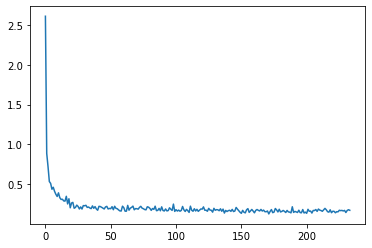

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)